# surface


In [1]:
# Read the file
data = []
with open('kn.her2.all', 'r') as file:
    for line in file:
        parts = line.split()
        pair = parts[0]
        dde = float(parts[1])
        de1 = float(parts[3])
        de2 = float(parts[4])
        data.append((pair, dde, de1, de2))

for i, row in enumerate(data):
    pair, dde, de1, de2 = row
    de12 = dde + de1 + de2
    data[i] = (pair, dde, de1, de2, de12)


In [2]:
data

[('A1B-B2A', 0.012168, -8.38054968975, -12.211337151, -20.579718840749997),
 ('A1B-B2C', -0.000907891, -8.38054968975, -8.17965538055, -16.5611129613),
 ('A1B-B2D', 0.000124631, -8.38054968975, -8.33986726217, -16.72029232092),
 ('A1B-A3B', 0.00878509, -8.38054968975, -6.41973451525, -14.791499115),
 ('A1B-A3C', 0.00893699, -8.38054968975, -5.49322355539, -13.864836255139998),
 ('A1B-A3D', 0.00987412, -8.38054968975, -9.96717477869, -18.33785034844),
 ('A1B-A4B', 0.000848137, -8.38054968975, -8.36709472165, -16.746796274399998),
 ('A1B-A4C', 0.000388086, -8.38054968975, -8.3004519064, -16.68061351015),
 ('A1B-A4D', 0.000465672, -8.38054968975, -8.35169317573, -16.73177719348),
 ('A1B-A5B', -7.491e-05, -8.38054968975, -8.17220654339, -16.55283114314),
 ('A1B-A5C', 0.000256306, -8.38054968975, -8.27075589634, -16.65104928009),
 ('A1B-A5D', 0.000659778, -8.38054968975, -8.31584165618, -16.69573156793),
 ('A1B-B6A', 0.00518208, -8.38054968975, -9.06889346242, -17.44426107217),
 ('A1B-B6C',

In [6]:
position_de = {}
for row in data:
    pair, dde, de1, de2, de12 = row
    pos1, pos2 = pair.split('-')
    pos1 = ''.join(filter(str.isdigit, pos1))  # Extract position number(s)
    pos2 = ''.join(filter(str.isdigit, pos2))
    
    if pos1 not in position_de:
        position_de[pos1] = []
    position_de[pos1].append(de1)
    
    if pos2 not in position_de:
        position_de[pos2] = []
    position_de[pos2].append(de2)

average_de = {pos: sum(values) / len(values) for pos, values in position_de.items()}

# Calculate average dde for all two positions
position_de12 = {}


for row in data:
    pair, dde, de1, de2, de12 = row
    pos1, pos2 = pair.split('-')
    pos1 = ''.join(filter(str.isdigit, pos1))  # Extract position number(s)
    pos2 = ''.join(filter(str.isdigit, pos2))
    if int(pos1) > int(pos2):
        key = (pos2, pos1)
    else:
        key = (pos1, pos2)
    if key not in position_de12:
        position_de12[key] = []
    position_de12[key].append(de12)

# for key, values in position_de12.items():
#     print(f"Key: {key}, Values: {values}")




In [14]:
position_de12

{('1', '2'): [-20.579718840749997,
  -16.5611129613,
  -16.72029232092,
  -20.45908669522,
  -16.44057304477,
  -16.599786824589998,
  -20.59366915345,
  -16.57493202,
  -16.734314282619998],
 ('1', '3'): [-14.791499115,
  -13.864836255139998,
  -18.33785034844,
  -14.671409319470001,
  -13.744312139609999,
  -18.217953912909998,
  -14.8058708177,
  -13.879271067839998,
  -18.35201018114],
 ('1', '4'): [-16.746796274399998,
  -16.68061351015,
  -16.73177719348,
  -16.62647635987,
  -16.560319534519998,
  -16.6115746824,
  -16.760945124099997,
  -16.694729125849996,
  -16.74586865818],
 ('1', '5'): [-16.55283114314,
  -16.65104928009,
  -16.69573156793,
  -16.43277586761,
  -16.53084938856,
  -16.575577819400003,
  -16.56734389384,
  -16.66533963079,
  -16.71007221063],
 ('1', '6'): [-17.44426107217,
  -13.88440973924,
  -12.551770379119999,
  -17.323711686640003,
  -13.764000723710001,
  -12.43095713359,
  -17.45897958487,
  -13.89941077194,
  -12.56586099182],
 ('1', '7'): [-14.358915

plot a 3d shape with pos1 as x axis, pos2 as y axis ( so each x and y corrospoinding to 9 values), the highest de12 as the shape's upper surface, and the lowest de12 as the shape's lower surface

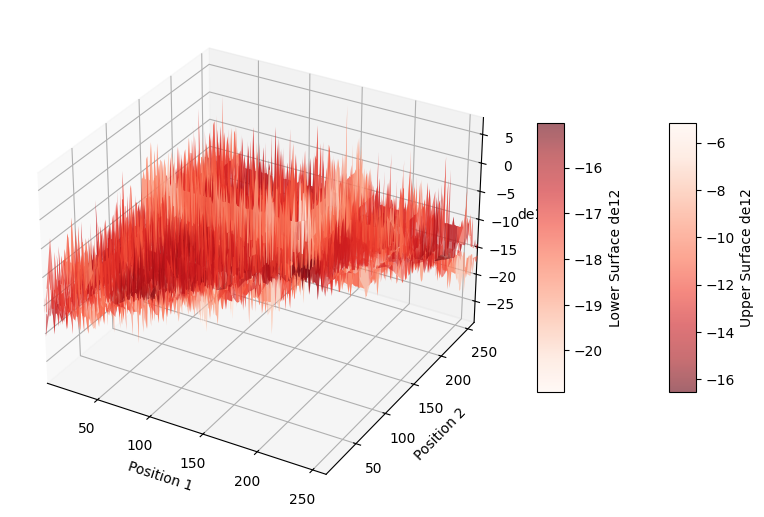

In [38]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

import matplotlib.pyplot as plt

# Extract unique positions for x and y axes
unique_positions = sorted(set(pos for pair in position_de12.keys() for pos in pair), key=int)
x_positions = [int(pos) for pos in unique_positions]
y_positions = [int(pos) for pos in unique_positions]

# Create a grid for x and y
x_grid, y_grid = np.meshgrid(x_positions, y_positions)

# Initialize z_upper and z_lower grids
z_upper_grid = np.full(x_grid.shape, np.nan)
z_lower_grid = np.full(x_grid.shape, np.nan)

# Populate z_upper and z_lower grids
for (pos1, pos2), de12_values in position_de12.items():
    x_idx = x_positions.index(int(pos1))
    y_idx = y_positions.index(int(pos2))
    z_upper_grid[y_idx, x_idx] = max(de12_values)
    z_lower_grid[y_idx, x_idx] = min(de12_values)

# Plot the 3D shape
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot the upper surface with reversed Reds colormap
surf_upper = ax.plot_surface(x_grid, y_grid, z_upper_grid, cmap='Reds_r', alpha=0.6)

# Plot the lower surface with the same colormap
surf_lower = ax.plot_surface(x_grid, y_grid, z_lower_grid, cmap='Reds', alpha=0.6)


# Add color bars for the upper and lower surfaces
fig.colorbar(surf_upper, ax=ax, shrink=0.5, aspect=10, label='Upper Surface de12')
fig.colorbar(surf_lower, ax=ax, shrink=0.5, aspect=10, label='Lower Surface de12')

# Set axis labels
ax.set_xlabel('Position 1')
ax.set_ylabel('Position 2')
ax.set_zlabel('de12')

# Set x and y axis limits
ax.set_xlim(1, 262)
ax.set_ylim(1, 262)

plt.show()

# scatter

[[         nan          nan          nan          nan          nan]
 [-16.44057304          nan          nan          nan          nan]
 [-13.74431214 -13.66637524          nan          nan          nan]
 [-16.56031953 -16.48065899 -13.78478093          nan          nan]
 [-16.43277587 -16.35302222 -13.65724088 -16.47332723          nan]]


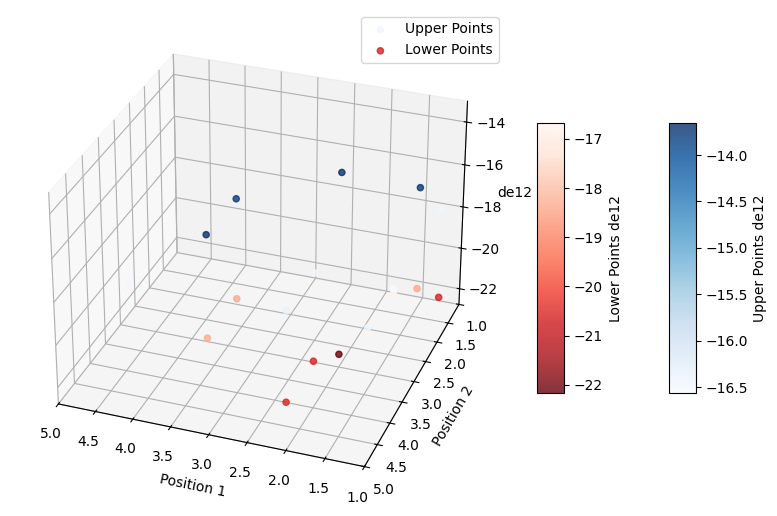

In [79]:
# Define the pairs to include
range_min, range_max = 1, 5
selected_pairs = [(str(i), str(j)) for i in range(range_min, range_max+1) for j in range(range_min, range_max+1)]

# Filter the position_de12 dictionary
filtered_position_de12 = {pair: values for pair, values in position_de12.items() if pair in selected_pairs}

# Extract unique positions for x and y axes from the filtered pairs
filtered_positions = sorted(set(pos for pair in filtered_position_de12.keys() for pos in pair), key=int)
x_positions_filtered = [int(pos) for pos in filtered_positions]
y_positions_filtered = [int(pos) for pos in filtered_positions]
# print(x_positions_filtered, y_positions_filtered)
# Create a grid for x and y
x_grid_filtered, y_grid_filtered = np.meshgrid(x_positions_filtered, y_positions_filtered)

# Initialize z_upper and z_lower grids for the filtered pairs
z_upper_grid_filtered = np.full(x_grid_filtered.shape, np.nan)
z_lower_grid_filtered = np.full(x_grid_filtered.shape, np.nan)

# Populate z_upper and z_lower grids for the filtered pairs
for (pos1, pos2), de12_values in filtered_position_de12.items():
    x_idx = x_positions_filtered.index(int(pos1))
    y_idx = y_positions_filtered.index(int(pos2))
    z_upper_grid_filtered[y_idx, x_idx] = max(de12_values)
    z_lower_grid_filtered[y_idx, x_idx] = min(de12_values)
print(z_upper_grid_filtered)

# Plot the 3D shape for the filtered pairs
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Extract x, y, and z values for the upper and lower points
x_scatter_filtered = []
y_scatter_filtered = []
z_upper_scatter_filtered = []
z_lower_scatter_filtered = []

for (pos1, pos2), de12_values in filtered_position_de12.items():
    x_scatter_filtered.append(int(pos1))
    y_scatter_filtered.append(int(pos2))
    z_upper_scatter_filtered.append(max(de12_values))
    z_lower_scatter_filtered.append(min(de12_values))

# Plot the 3D scatter plot for upper points
scatter_upper = ax.scatter(
    x_scatter_filtered, y_scatter_filtered, z_upper_scatter_filtered, 
    c=z_upper_scatter_filtered, cmap='Blues', alpha=0.8, label='Upper Points'
)

# Plot the 3D scatter plot for lower points
scatter_lower = ax.scatter(
    x_scatter_filtered, y_scatter_filtered, z_lower_scatter_filtered, 
    c=z_lower_scatter_filtered, cmap='Reds_r', alpha=0.8, label='Lower Points'
)

# Add a color bar for the upper points
fig.colorbar(scatter_upper, ax=ax, shrink=0.5, aspect=10, label='Upper Points de12')

# Add a color bar for the lower points
fig.colorbar(scatter_lower, ax=ax, shrink=0.5, aspect=10, label='Lower Points de12')

# Rotate the plot by 90 degrees
ax.view_init(elev=30, azim=110)

# Set axis labels
ax.set_xlabel('Position 1')
ax.set_ylabel('Position 2')
ax.set_zlabel('de12')

# fig.show()
plt.legend()
plt.xlim(range_min, range_max)
plt.ylim(range_min, range_max)
plt.show()


##############################create a 3d scatter plot ###############################
import plotly.graph_objects as go

fig = go.Figure()

# Add upper points
fig.add_trace(go.Scatter3d(
    x=x_scatter_filtered,
    y=y_scatter_filtered,
    z=z_upper_scatter_filtered,
    mode='markers',
    marker=dict(
        size=8,
        color=z_upper_scatter_filtered,
        colorscale='Blues',
        opacity=0.8
    ),
    name='Upper Points'
))

# Add lower points
fig.add_trace(go.Scatter3d(
    x=x_scatter_filtered,
    y=y_scatter_filtered,
    z=z_lower_scatter_filtered,
    mode='markers',
    marker=dict(
        size=8,
        color=z_lower_scatter_filtered,
        colorscale='Reds_r',
        opacity=0.8
    ),
    name='Lower Points'
))

# Update layout
fig.update_layout(
    scene=dict(
        xaxis=dict(title='Position 1', range=[range_min, range_max]),
        yaxis=dict(title='Position 2', range=[range_min, range_max]),
        zaxis=dict(title='de12')
    ),
    margin=dict(l=0, r=0, b=0, t=0)
)

# Save and display the figure
fig.write_html(f"{range_min}-{range_max}_3d_scatter.html")
# fig.show()

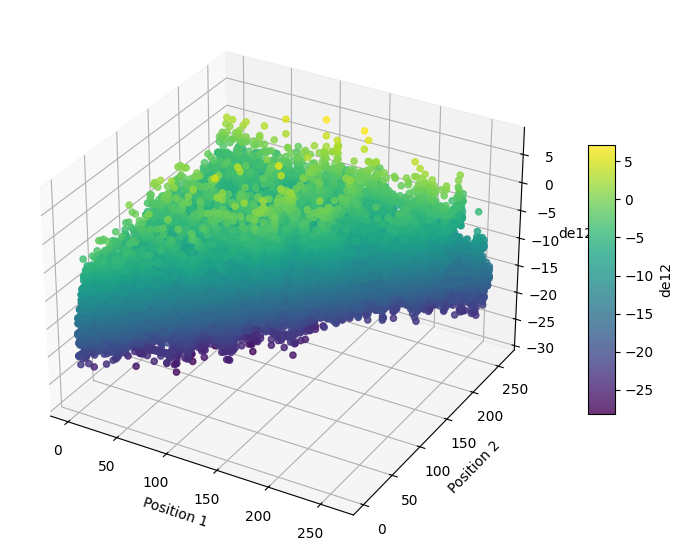

In [23]:
# Extract x, y, and z values for the scatter plot
x_scatter = []
y_scatter = []
z_scatter = []

for (pos1, pos2), de12_values in position_de12.items():
    x_scatter.extend([int(pos1)] * len(de12_values))
    y_scatter.extend([int(pos2)] * len(de12_values))
    z_scatter.extend(de12_values)

# Plot the 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(x_scatter, y_scatter, z_scatter, c=z_scatter, cmap='viridis', alpha=0.8)

# Add a color bar to indicate z values
fig.colorbar(scatter, ax=ax, shrink=0.5, aspect=10, label='de12')

# Set axis labels
ax.set_xlabel('Position 1')
ax.set_ylabel('Position 2')
ax.set_zlabel('de12')

plt.show()